<a href="https://colab.research.google.com/github/Caloca24/Pycaret_Udemy_Course/blob/main/BankCustomerChurn_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Workflow with PyCaret



1.   Load the dataset and install pycaret
2.   Preprocessing with PyCaret Setup
3.   Compare the models
4.   Create the models
5.   Plot the models (confusion matrix, precision-recall, AUC)
6.   Undertake predictions







In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving BANK_CHURNDATASET_.csv to BANK_CHURNDATASET_.csv


In [4]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['BANK_CHURNDATASET_.csv']))

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Explore the dataset

In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.shape

(10000, 12)

<Axes: xlabel='country', ylabel='count'>

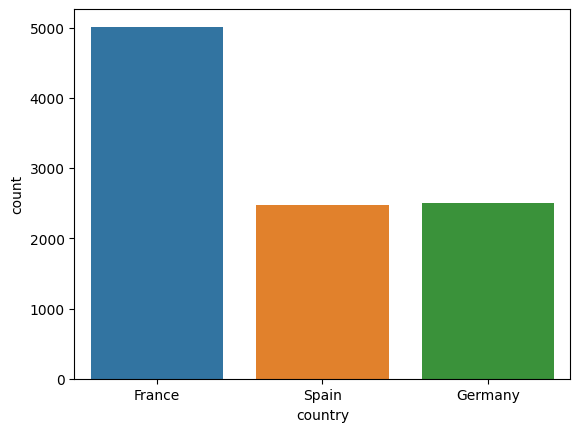

In [9]:
import seaborn as sns
sns.countplot(data=df, x='country', hue = 'country')

<Axes: xlabel='churn', ylabel='count'>

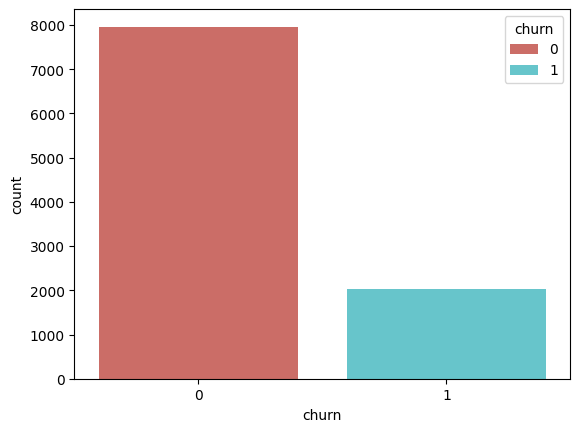

In [15]:
import seaborn as sns
sns.countplot(data=df, x='churn', palette=sns.color_palette("hls", 2), saturation=0.75, hue = 'churn')

<Axes: xlabel='gender', ylabel='count'>

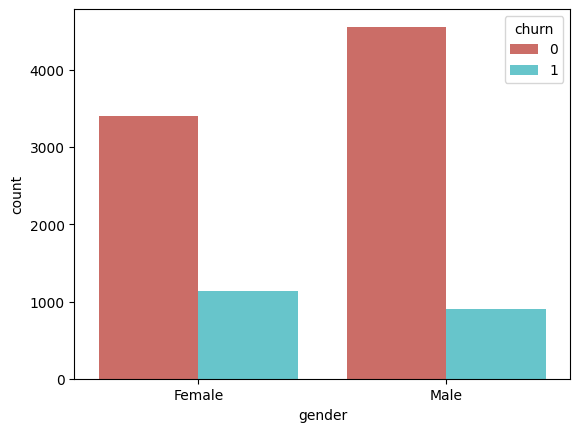

In [16]:
import seaborn as sns
sns.countplot(data=df, x='gender',palette=sns.color_palette("hls", 2), saturation=0.75, hue = 'churn')

In [17]:
df.size

120000

In [18]:
df.dtypes

,0
customer_id,int64
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64


In [ ]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

#Install PyCaret

In [ ]:
!pip install pycaret

#Split the dataset

In [ ]:
data = df.sample(frac=0.90, random_state=888).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (9000, 12)
Unseen Data For Predictions: (1000, 12)


In [ ]:
from pycaret.classification import *

#Undertake Preprocessing with the Setup Function

In [ ]:
setup(data = data, target = 'churn', session_id=123, ignore_features=['customer_id'])

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(9000, 12)"
4,Transformed data shape,"(9000, 13)"
5,Transformed train set shape,"(6300, 13)"
6,Transformed test set shape,"(2700, 13)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,8


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8605,0.8538,0.4962,0.7433,0.5934,0.5135,0.5297,0.2310
gbc,Gradient Boosting Classifier,0.8600,0.8600,0.4569,0.7743,0.5730,0.4961,0.5216,0.4460
rf,Random Forest Classifier,0.8557,0.8416,0.4454,0.7567,0.5591,0.4799,0.5049,0.4350
ada,Ada Boost Classifier,0.8533,0.8373,0.4646,0.7269,0.5658,0.4829,0.5009,0.4950
et,Extra Trees Classifier,0.8494,0.8310,0.4269,0.7331,0.5374,0.4553,0.4801,0.4870
xgboost,Extreme Gradient Boosting,0.8481,0.8329,0.4769,0.6937,0.5639,0.4758,0.4888,0.4780
ridge,Ridge Classifier,0.8060,0.0000,0.1331,0.6464,0.2195,0.1610,0.2280,0.2460
lda,Linear Discriminant Analysis,0.8041,0.7653,0.2385,0.5595,0.3336,0.2404,0.2707,0.2640
dummy,Dummy Classifier,0.7937,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2260
lr,Logistic Regression,0.7905,0.6688,0.0638,0.3629,0.1045,0.0599,0.0866,0.3750


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
dt=create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7746,0.6702,0.4923,0.4571,0.4741,0.3309,0.3313
1,0.7873,0.6782,0.4923,0.4848,0.4885,0.3543,0.3543
2,0.7714,0.6653,0.4846,0.4500,0.4667,0.3215,0.3218
3,0.7571,0.6421,0.4462,0.4173,0.4312,0.2771,0.2773
4,0.7825,0.6780,0.5000,0.4745,0.4869,0.3490,0.3492
5,0.7873,0.6753,0.4846,0.4846,0.4846,0.3506,0.3506
6,0.7524,0.6590,0.5000,0.4167,0.4545,0.2961,0.2981
7,0.7683,0.6775,0.5231,0.4474,0.4823,0.3342,0.3358
8,0.7825,0.6695,0.4769,0.4733,0.4751,0.3380,0.3380


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8667,0.8764,0.4692,0.8026,0.5922,0.5190,0.5457
1,0.8698,0.8439,0.4462,0.8529,0.5859,0.5175,0.5558
2,0.8524,0.8648,0.4769,0.7126,0.5714,0.4865,0.5008
3,0.8571,0.8411,0.4846,0.7326,0.5833,0.5014,0.5170
4,0.8603,0.8470,0.4077,0.8281,0.5464,0.4749,0.5167
5,0.8429,0.8786,0.3769,0.7313,0.4975,0.4154,0.4475
6,0.8810,0.8770,0.5308,0.8313,0.6479,0.5804,0.6016
7,0.8651,0.8587,0.4538,0.8082,0.5813,0.5083,0.5384
8,0.8429,0.8323,0.4154,0.7013,0.5217,0.4350,0.4564


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8603,0.8536,0.4692,0.7625,0.5810,0.5028,0.5241
1,0.8603,0.8345,0.4308,0.8000,0.5600,0.4857,0.5186
2,0.8524,0.8494,0.4769,0.7126,0.5714,0.4865,0.5008
3,0.8508,0.8293,0.4462,0.7250,0.5524,0.4689,0.4888
4,0.8492,0.8279,0.4000,0.7536,0.5226,0.4429,0.4743
5,0.8492,0.8525,0.3846,0.7692,0.5128,0.4351,0.4718
6,0.8746,0.8625,0.5154,0.8072,0.6291,0.5580,0.5784
7,0.8571,0.8326,0.4154,0.7941,0.5455,0.4704,0.5052
8,0.8444,0.8132,0.4000,0.7222,0.5149,0.4312,0.4579


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


#Plot the model

#Confusion Matrix

A confusion matrix, also known as an error matrix, is a table that is used to evaluate the performance of a classification model on a set of data for which the true values are known.

In a binary classification setting, the confusion matrix is a 2x2 matrix with four components:

True Positives (TP): The number of positive samples that were correctly
classified as positive by the model.

False Positives (FP): The number of negative samples that were incorrectly classified as positive by the model.

True Negatives (TN): The number of negative samples that were correctly classified as negative by the model.

False Negatives (FN): The number of positive samples that were incorrectly classified as negative by the model.


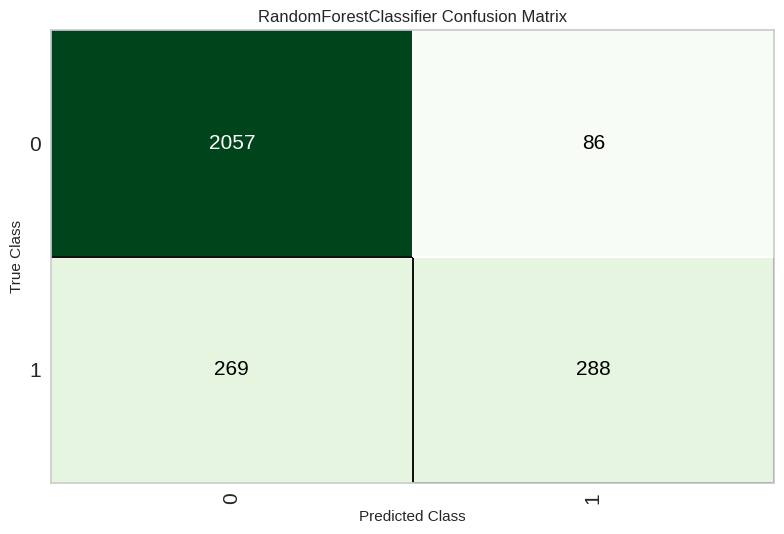

In [ ]:
plot_model(rf, plot = 'confusion_matrix')

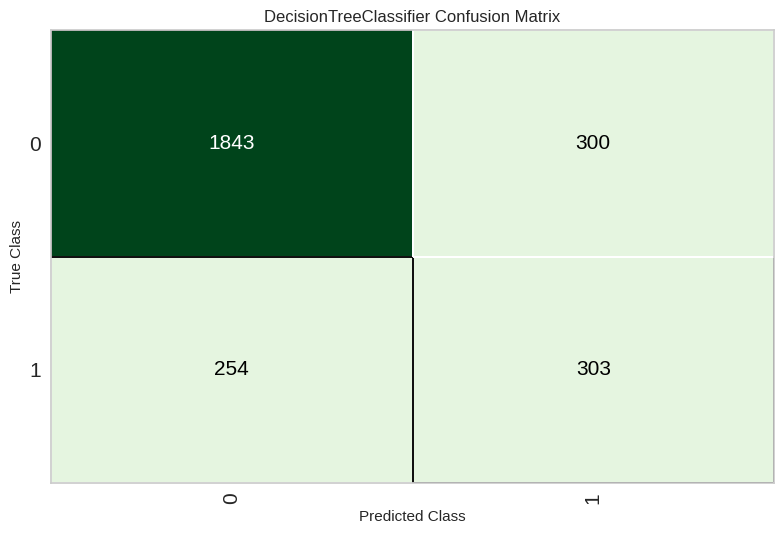

In [ ]:
plot_model(dt, plot = 'confusion_matrix')

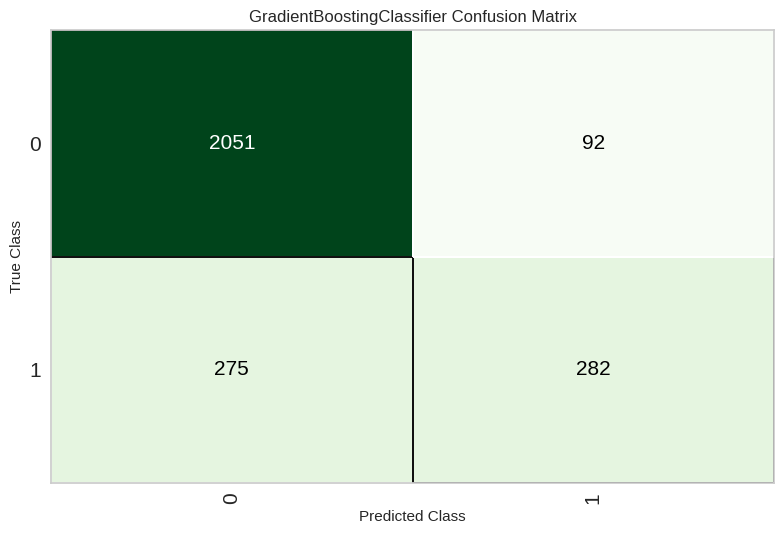

In [ ]:
plot_model(gbc, plot = 'confusion_matrix')

Accuracy: It measures the overall correctness of the model and is calculated as (TP + TN) / (TP + TN + FP + FN). It represents the proportion of correctly classified samples out of the total number of samples.

Precision (also called Positive Predictive Value): It represents the accuracy of the positive predictions made by the model and is calculated as TP / (TP + FP). It indicates the proportion of positive predictions that were actually correct.

Recall (also called Sensitivity or True Positive Rate): It is the same as the True Positive Rate in the ROC curve and is calculated as TP / (TP + FN). It represents the proportion of actual positive samples that were correctly identified by the model.

Specificity (also called True Negative Rate): It is calculated as TN / (TN + FP) and represents the proportion of actual negative samples that were correctly identified by the model.

F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall when they have significantly different values.

#ROC Curve

The Receiver Operating Characteristic (ROC) curve is a graphical representation that is commonly used to assess the performance of a binary classification model. It illustrates the trade-off between the true positive rate (sensitivity or recall) and the false positive rate (1-specificity) as the discrimination threshold of the model is varied.

To understand the ROC curve, let's break down some key terms:

True Positive Rate (TPR) or Sensitivity or Recall:
TPR measures the proportion of actual positive samples (in the dataset) that the model correctly identifies as positive. It is calculated as:
TPR = (True Positives) / (True Positives + False Negatives)

False Positive Rate (FPR) or 1-Specificity:
FPR measures the proportion of actual negative samples that the model incorrectly identifies as positive. It is calculated as:
FPR = (False Positives) / (False Positives + True Negatives)

The ROC curve is created by plotting the TPR on the y-axis against the FPR on the x-axis, as the classification threshold is varied from 0 to 1. Each point on the curve represents a different threshold. The diagonal line from (0,0) to (1,1) represents the performance of a random classifier. A good model will have a ROC curve that lies above this line.

Interpreting the ROC curve:

Area Under the Curve (AUC): AUC is a single metric that summarizes the ROC curve's performance. It ranges from 0 to 1, where 1 indicates a perfect classifier, and 0.5 represents a random classifier. A higher AUC value indicates better overall model performance.

Point on the Curve: A specific point on the ROC curve corresponds to a particular threshold value. Different threshold values give different trade-offs between TPR and FPR.

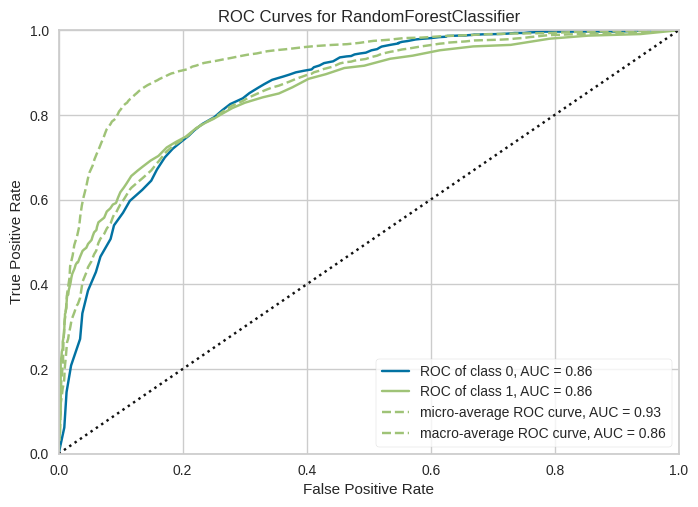

In [ ]:
plot_model(rf, plot = 'auc')

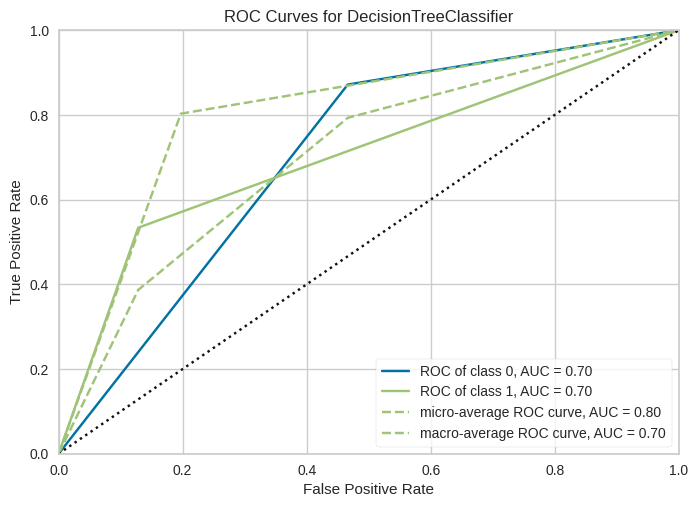

In [ ]:
plot_model(dt, plot = 'auc')

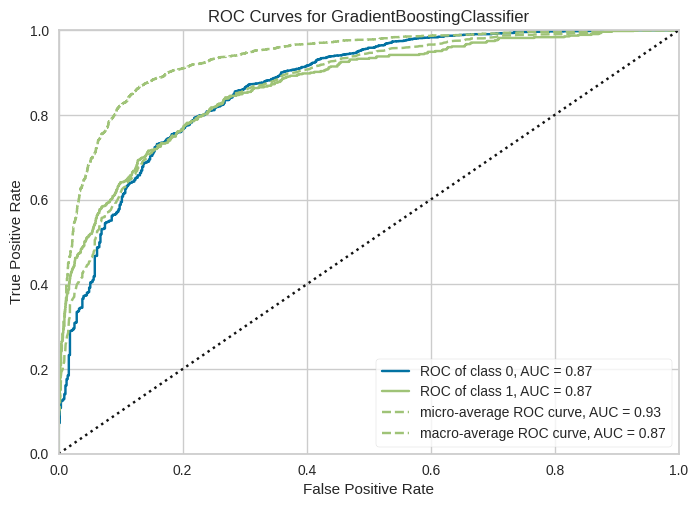

In [ ]:
plot_model(gbc, plot = 'auc')

#Precision Recall Curve

Significance of the PR Curve

*The PR curve is especially useful when dealing with imbalanced datasets, where one class heavily outnumbers the other.*

*In such cases, accuracy can be misleading, and the PR curve provides more insightful information about the model's performance.*

*The objective is to correctly classify the minority class (positive class) while maintaining a low rate of false positives.*

**Precision:** Precision, also known as Positive Predictive Value (PPV), measures the accuracy of the positive predictions made by the model. It is calculated as TP / (TP + FP), where TP is the number of true positive predictions, and FP is the number of false positive predictions.

**Recall:** Recall, also known as Sensitivity or True Positive Rate (TPR), measures the proportion of actual positive samples that the model correctly identifies as positive. It is calculated as TP / (TP + FN), where TP is the number of true positive predictions, and FN is the number of false negative predictions.

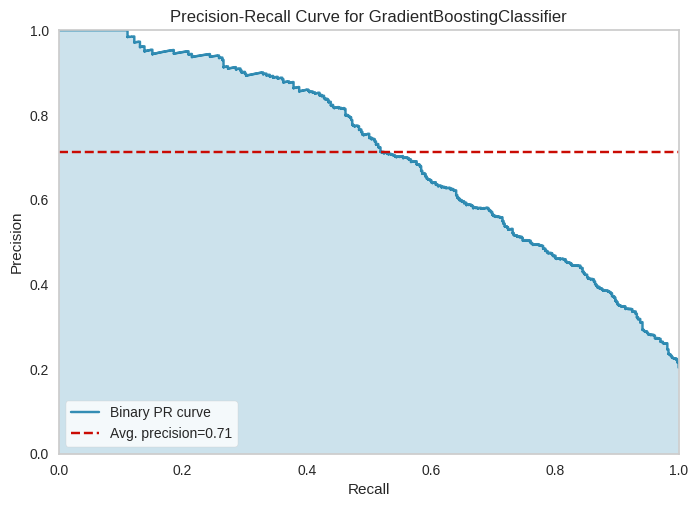

In [ ]:
plot_model(gbc, plot = 'pr')

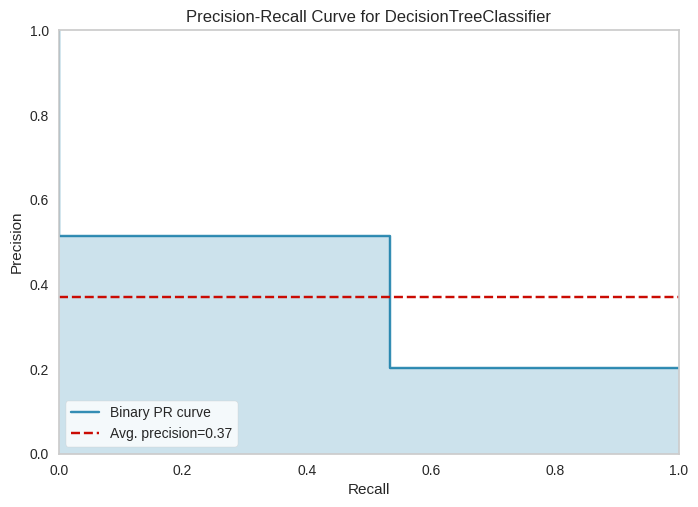

In [ ]:
plot_model(dt, plot = 'pr')

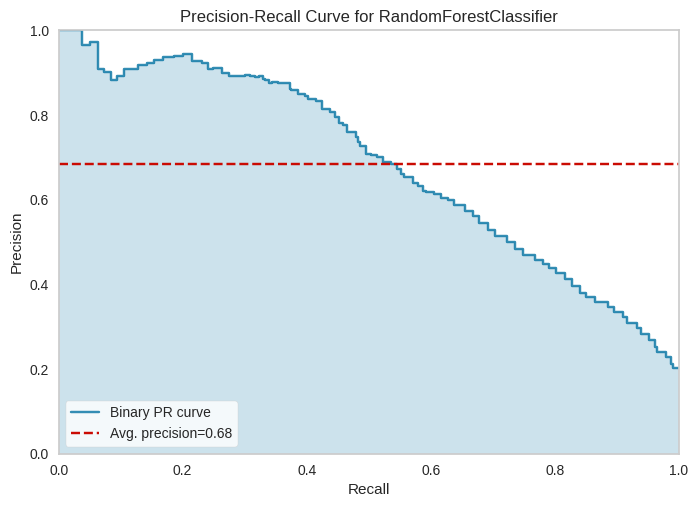

In [ ]:
plot_model(rf, plot = 'pr')

Interpreting the PR curve:

A perfect classifier would achieve both precision and recall equal to 1, resulting in a point at the top-right corner of the PR curve.
A random classifier would have points along a diagonal line, as it would have precision roughly equal to the ratio of positive samples in the dataset and recall increasing with the number of positive samples classified.
A good classifier's PR curve will be closer to the top-right corner, indicating high precision and recall across different threshold values.

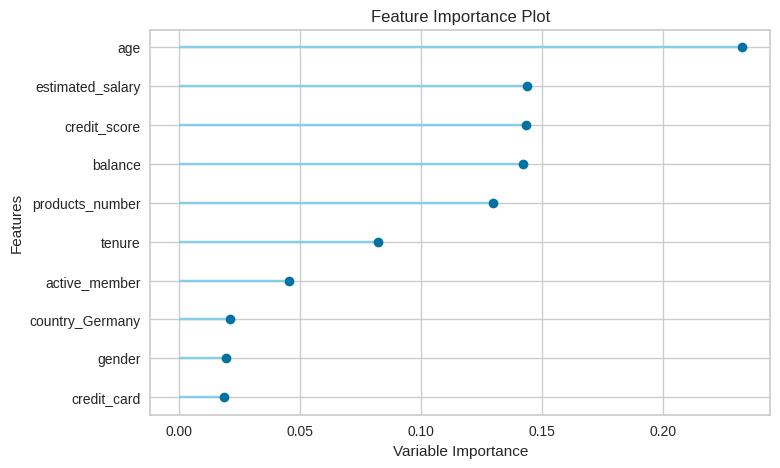

In [ ]:
plot_model(rf, plot='feature')

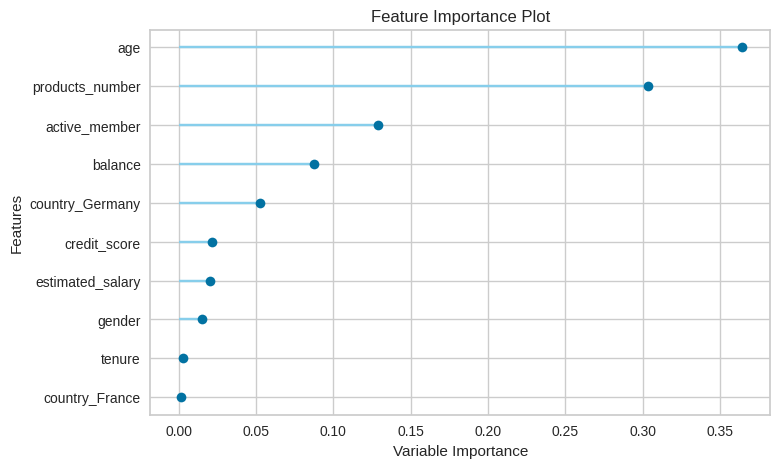

In [ ]:
plot_model(gbc, plot='feature')

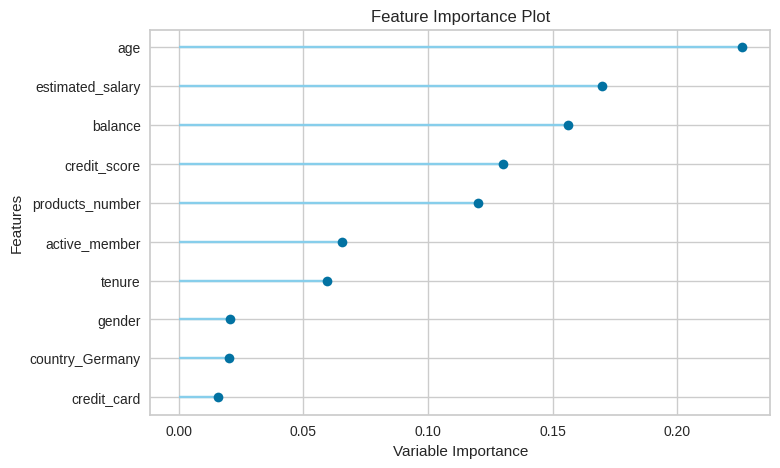

In [ ]:
plot_model(dt, plot='feature')

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**class report** : The class report helps you understand how well the model performs for each individual class, and the aggregated metrics provide an overall view of the model's performance. It is a valuable tool to assess the model's ability to discriminate between classes and identify any potential imbalances or biases in the classification results.

#Predict Model and Finalize Model

In [ ]:
predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8641,0.8810,0.5063,0.7540,0.6058,0.5275,0.5428


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,prediction_label,prediction_score
3245,766,Germany,Female,38,7,130933.742188,1,0,1,2035.939941,0,0,0.8051
5589,673,Germany,Female,34,1,127122.789062,3,0,1,76703.101562,0,1,0.8375
6254,605,France,Male,41,5,91612.906250,1,1,1,28427.839844,0,0,0.8944
8245,599,France,Female,43,4,0.000000,1,1,0,170347.093750,0,1,0.6706
484,708,France,Male,34,3,0.000000,1,0,1,121457.882812,1,0,0.8927
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7049,624,Germany,Female,27,7,104848.679688,1,1,1,167387.359375,0,0,0.8322
6760,814,France,Female,31,4,0.000000,2,1,1,142029.171875,0,0,0.9779
916,673,France,Male,31,1,108345.218750,1,0,1,38802.031250,0,0,0.9458
6593,704,Spain,Female,24,2,0.000000,1,1,0,35600.250000,1,0,0.8058


In [ ]:
#uses previously unseen data
final_gbc = finalize_model(gbc)

In [ ]:
print(final_gbc)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['credit_score', 'age', 'tenure',
                                             'balance', 'products_number',
                                             'credit_card', 'active_member',
                                             'estimated_salary'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strateg...
                                            criterion='friedman_mse', init=None,
      

# Make predictions

In [ ]:
predict_model(final_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8759,0.9000,0.5368,0.7952,0.6409,0.5693,0.5854


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,prediction_label,prediction_score
3245,766,Germany,Female,38,7,130933.742188,1,0,1,2035.939941,0,0,0.8260
5589,673,Germany,Female,34,1,127122.789062,3,0,1,76703.101562,0,1,0.7234
6254,605,France,Male,41,5,91612.906250,1,1,1,28427.839844,0,0,0.8889
8245,599,France,Female,43,4,0.000000,1,1,0,170347.093750,0,1,0.6548
484,708,France,Male,34,3,0.000000,1,0,1,121457.882812,1,0,0.8888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7049,624,Germany,Female,27,7,104848.679688,1,1,1,167387.359375,0,0,0.8311
6760,814,France,Female,31,4,0.000000,2,1,1,142029.171875,0,0,0.9771
916,673,France,Male,31,1,108345.218750,1,0,1,38802.031250,0,0,0.9289
6593,704,Spain,Female,24,2,0.000000,1,1,0,35600.250000,1,0,0.7636


#Undertake Predictions on Unseen Data

In [ ]:
unseen_predictions = predict_model(final_gbc, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8760,0.8707,0.4749,0.7391,0.5782,0.5096,0.5267


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,prediction_label,prediction_score
0,15723217,616,France,Male,37,9,0.000000,1,1,0,111312.960938,0,0,0.7928
1,15733111,688,Spain,Male,32,6,124179.296875,1,1,1,138759.156250,0,0,0.9410
2,15610727,605,France,Male,36,7,128829.250000,1,1,0,190588.593750,0,0,0.8790
3,15792720,676,France,Male,33,6,171490.781250,1,0,0,79099.640625,0,0,0.9051
4,15723153,708,Spain,Male,33,3,0.000000,2,1,0,138613.203125,0,0,0.9764
